In [1]:
from SimpleBandits import Simulator, RandomPolicy, AveragePolicy
import matplotlib.pyplot as plt
import numpy as np

In [91]:
# play every arm at least once, then play arm with highest average reward
class ThresholdPolicy:
    def __init__(self, n_actions):
        self.n_actions = n_actions
        # add something to save the average values
        self.reset()
    # reset everything to zero, forgetting the past    
    def reset(self):
        self.n_pulls = np.zeros(self.n_actions)
        self.total_reward = np.zeros(self.n_actions)
        self.average_reward = 2 + np.zeros(self.n_actions)
        self.t = 0
        pass
    # take what seems to be the best action
    def act(self):
        return np.argmax(self.average_reward + np.sqrt(2*np.log(self.t)/(0.00001 + self.n_pulls)))
        
        
    ## Here, we update what we learn from observing an action and a reward
    def update(self, action, reward):
        self.n_pulls[action] += 1
        self.total_reward[action] += reward
        self.average_reward[action] = self.total_reward[action] / self.n_pulls[action]
        self.t += 1
        pass


In [92]:
n_drugs = 8
n_experiments = 1000
horizon = 1000
environment = Simulator(n_drugs)


In [93]:
# By initialising the experiment outside the outer loop,
# we always run the experiment in the same environment.
# Hence, the randomness is only due to the policy and
# the inherent stochasticity of the environment.
def evaluate(environment, policy, horizon, n_experiments):
    R = np.zeros([horizon, n_experiments])
    for exp in range(n_experiments):
        environment.reset()
        policy.reset()
        for t in range(horizon):
            a_t = policy.act()
            r_t = environment.step(a_t)
            policy.update(a_t, r_t)
            R[t, exp] = r_t
    return R

In [94]:
R_average = evaluate(environment, AveragePolicy(n_drugs), horizon, n_experiments)
R_threshold = evaluate(environment, ThresholdPolicy(n_drugs), horizon, n_experiments)


/tmp/ipykernel_125208/3352855030.py:16: RuntimeWarning: divide by zero encountered in log
  return np.argmax(self.average_reward + np.sqrt(2*np.log(self.t)/(0.00001 + self.n_pulls)))
/tmp/ipykernel_125208/3352855030.py:16: RuntimeWarning: invalid value encountered in sqrt
  return np.argmax(self.average_reward + np.sqrt(2*np.log(self.t)/(0.00001 + self.n_pulls)))


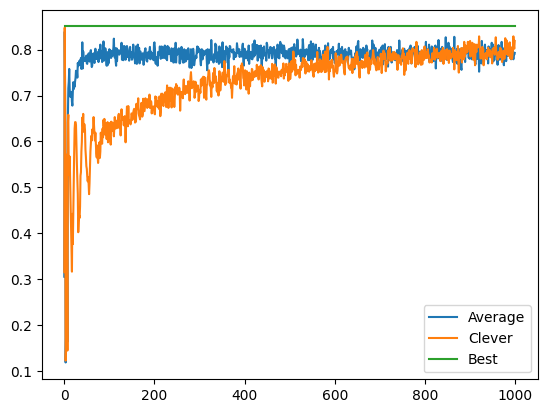

In [95]:
plt.plot(np.mean(R_average, axis=1))
plt.plot(np.mean(R_threshold, axis=1))
r_max = max(environment.mean)
plt.plot([1, horizon], [r_max, r_max])
plt.legend(["Average", "Clever", "Best"])

In [5]:
# By initialising the experiment inside the outer loop,
# we always run the experiment in a different environment.
# Hence, the randomness is due to the variability in the
# environments, as well as the policy and
# the inherent stochasticity of the environment.
R = np.zeros([horizon, n_experiments])
for exp in range(n_experiments):
    environment = Simulator(n_drugs)
    policy = AveragePolicy(n_drugs)
    environment.reset()
    policy.reset()
    for t in range(horizon):
        a_t = policy.act()
        r_t = environment.step(a_t)
        policy.update(a_t, r_t)
        R[t, exp] = r_t


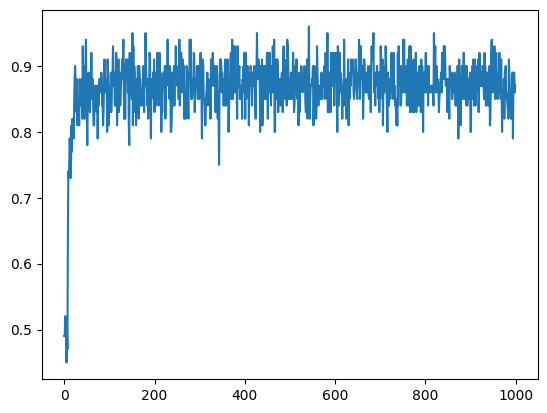

In [6]:
plt.plot(np.mean(R, axis=1))